In [ ]:
import kagglehub
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [12]:
pd.set_option("display.max_columns", None)
sns.set_theme(style="whitegrid")

In [ ]:
path = kagglehub.dataset_download(
    "harshitshankhdhar/imdb-dataset-of-top-1000-movies-and-tv-shows"
)
print(path)


/Users/yuanzheyi/.cache/kagglehub/datasets/harshitshankhdhar/imdb-dataset-of-top-1000-movies-and-tv-shows/versions/1


In [15]:
df = pd.read_csv(f"{path}/imdb_top_1000.csv")
try:
    df = pd.read_csv(f"{path}/imdb_top_1000.csv")
except FileNotFoundError:
    print("错误：请确保 'IMDB_Movies.csv' 文件已下载并与此Notebook在同一文件夹下。")

In [16]:
print("显示前五行：")
display(df.head(5))

显示前五行：


,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [18]:
print("显示基本信息：")
print(df.info())


显示基本信息：
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB
None


In [20]:
print("数据统计摘要：")
print(df.describe())

数据统计摘要：
       IMDB_Rating  Meta_score   No_of_Votes
count  1000.000000  843.000000  1.000000e+03
mean      7.949300   77.971530  2.736929e+05
std       0.275491   12.376099  3.273727e+05
min       7.600000   28.000000  2.508800e+04
25%       7.700000   70.000000  5.552625e+04
50%       7.900000   79.000000  1.385485e+05
75%       8.100000   87.000000  3.741612e+05
max       9.300000  100.000000  2.343110e+06


In [ ]:
# 处理缺失值
# 'Certificate' 和 'Meta_score' 有较多缺失值，我们先观察
print(f"\nMeta_score列的缺失值数量:{df['Meta_score'].isnull().sum()}")

meta_score_median = df["Meta_score"].median()
df["Meta_score"] = df["Meta_score"].fillna(meta_score_median)
print(f"用中位数填充后，Meta_score列的缺失值数量: {df['Meta_score'].isnull().sum()}")


Meta_score列的缺失值数量:0
用中位数填充后，Meta_score列的缺失值数量: 0


In [ ]:
df["Gross_M"] = (
    df["Gross"].str.replace("$", "").str.replace(",", "", regex=False).astype(float)
)
df["Gross_M"] = df["Gross_M"] / 1000000

In [ ]:
df["Runtime_min"] = df["Runtime"].str.extract("(\d+)").astype(int)

In [29]:
print("处理后的数据前五行")
display(df[["Series_Title", "Gross_M", "Runtime_min"]].head(5))

处理后的数据前五行


,Series_Title,Gross_M,Runtime_min
0,The Shawshank Redemption,28.341469,142
1,The Godfather,134.966411,175
2,The Dark Knight,534.858444,152
3,The Godfather: Part II,57.300000,202
4,12 Angry Men,4.360000,96


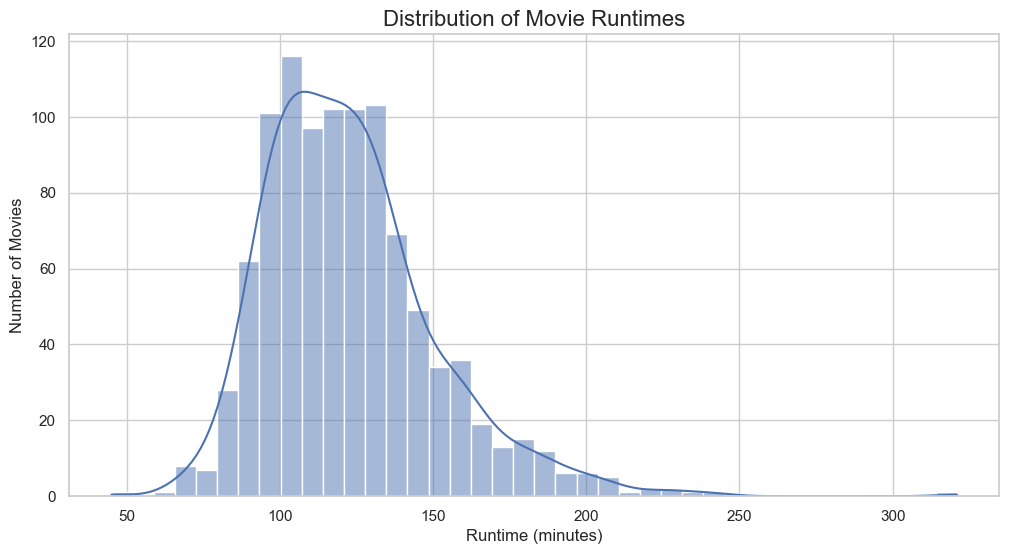

In [ ]:
# 电影时长主要分布在哪个区间？
plt.figure(figsize=(12, 6))
sns.histplot(df["Runtime_min"], bins=40, kde=True)
plt.title("Distribution of Movie Runtimes", fontsize=16)
plt.xlabel("Runtime (minutes)")
plt.ylabel("Number of Movies")
plt.show()

Text(0, 0.5, 'Number of Movies')

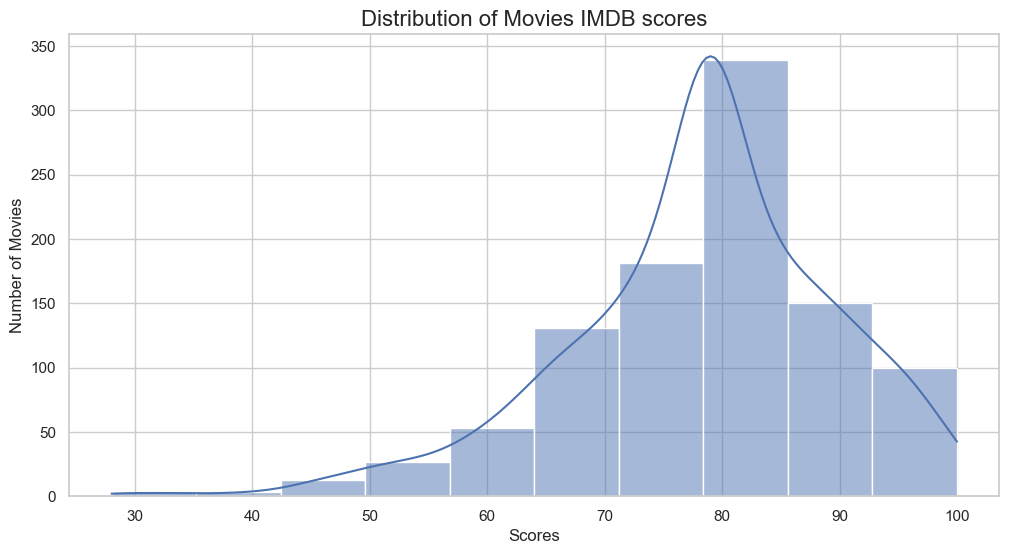

In [ ]:
# IMDB评分的分布情况如何？
plt.figure(figsize=(12, 6))
sns.histplot(df["Meta_score"], bins=10, kde=True)
plt.title("Distribution of Movies IMDB scores", fontsize=16)
plt.xlabel("Scores")
plt.ylabel("Number of Movies")

Text(0, 0.5, 'Number of Movies')

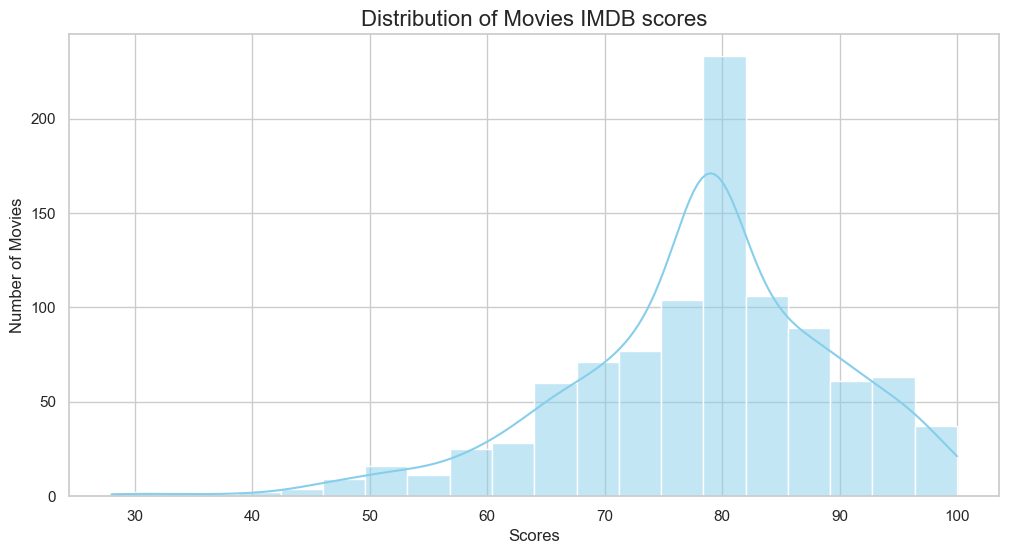

In [ ]:
# IMDB评分的分布情况如何？
plt.figure(figsize=(12, 6))
sns.histplot(df["Meta_score"], bins=20, kde=True, color="skyblue")
plt.title("Distribution of Movies IMDB scores", fontsize=16)
plt.xlabel("Scores")
plt.ylabel("Number of Movies")

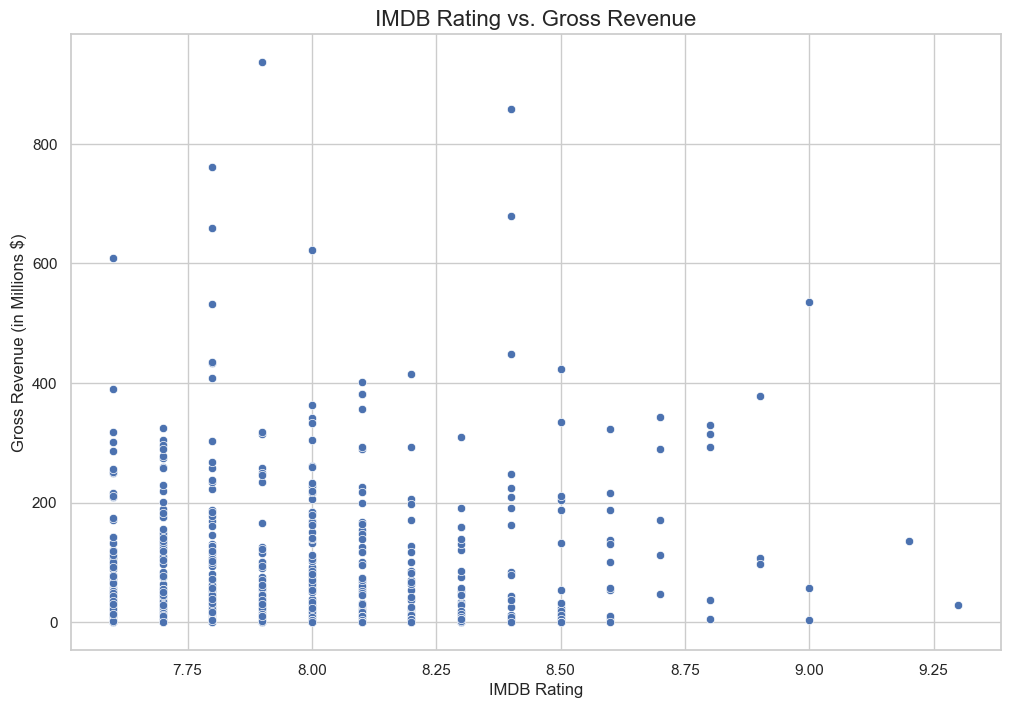

In [39]:
# 电影评分与票房收入之间有关系吗？
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x="IMDB_Rating", y="Gross_M")
plt.title("IMDB Rating vs. Gross Revenue", fontsize=16)
plt.xlabel("IMDB Rating")
plt.ylabel("Gross Revenue (in Millions $)")
plt.show()

In [40]:
display(df["IMDB_Rating"])

0      9.3
1      9.2
2      9.0
3      9.0
4      9.0
      ... 
995    7.6
996    7.6
997    7.6
998    7.6
999    7.6
Name: IMDB_Rating, Length: 1000, dtype: float64

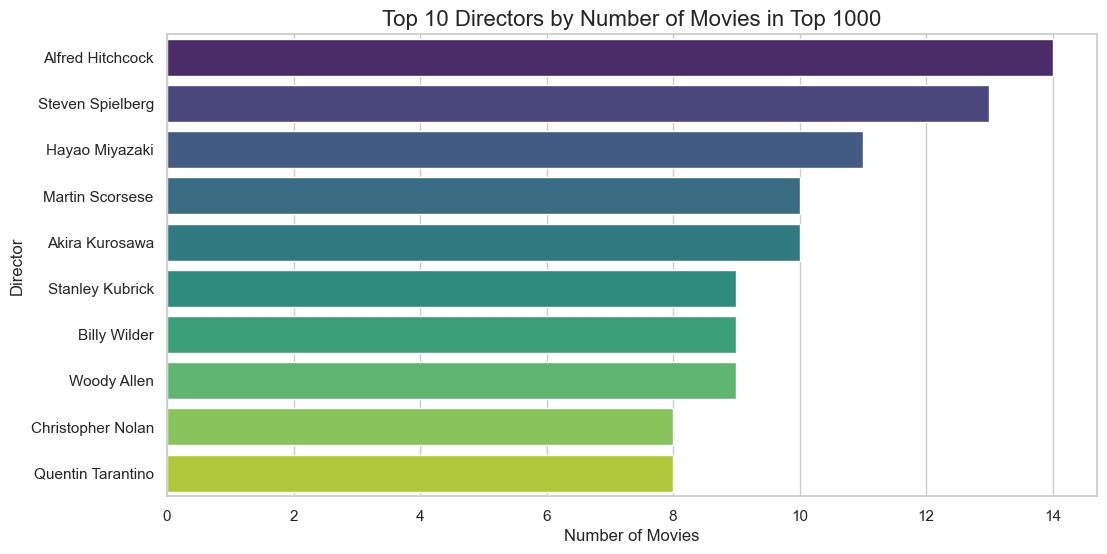

In [ ]:
# 哪个导演的作品最多？（Top 10）
top_10_directors = df["Director"].value_counts().nlargest(10)

plt.figure(figsize=(12, 6))
# sns.barplot(x=top_10_directors.values, y=top_10_directors.index, palette="viridis")
sns.barplot(
    x=top_10_directors.values,
    y=top_10_directors.index,
    hue=top_10_directors.index,
    palette="viridis",
    legend=False,
)
plt.title("Top 10 Directors by Number of Movies in Top 1000", fontsize=16)
plt.xlabel("Number of Movies")
plt.ylabel("Director")
plt.show()